In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Age Stats

In [8]:
min_age = df['age'].min()
max_age = df['age'].max()
mean_age = round(df['age'].mean(),1)

print('Min age: %s' %min_age)
print('Max age: %s' %max_age)
print('Mean age: %s' %mean_age)

Min age: 29
Max age: 77
Mean age: 54.4


#### Sex Stats

In [58]:
female = len(df[df['sex'] ==0])
male = len(df[df['sex'] ==1])

print('Percentage of female: {:.2f} %' .format(female/len(df['sex'])*100))
print('Percentage of male: {:.2f} %' .format(male/len(df['sex'])*100))

Percentage of female: 31.68 %
Percentage of male: 68.32 %


#### Target Stats

In [121]:
no_disease = len(df[df['target'] ==0])
with_disease = len(df[df['target'] ==1])

print('Percentage of people without disease: {:.2f} %' .format(no_disease/len(df['target'])*100))
print('Percentage of people with disease: {:.2f} %' .format(with_disease/len(df['target'])*100))

Percentage of people without disease: 45.54 %
Percentage of people with disease: 54.46 %


### Data Visualization

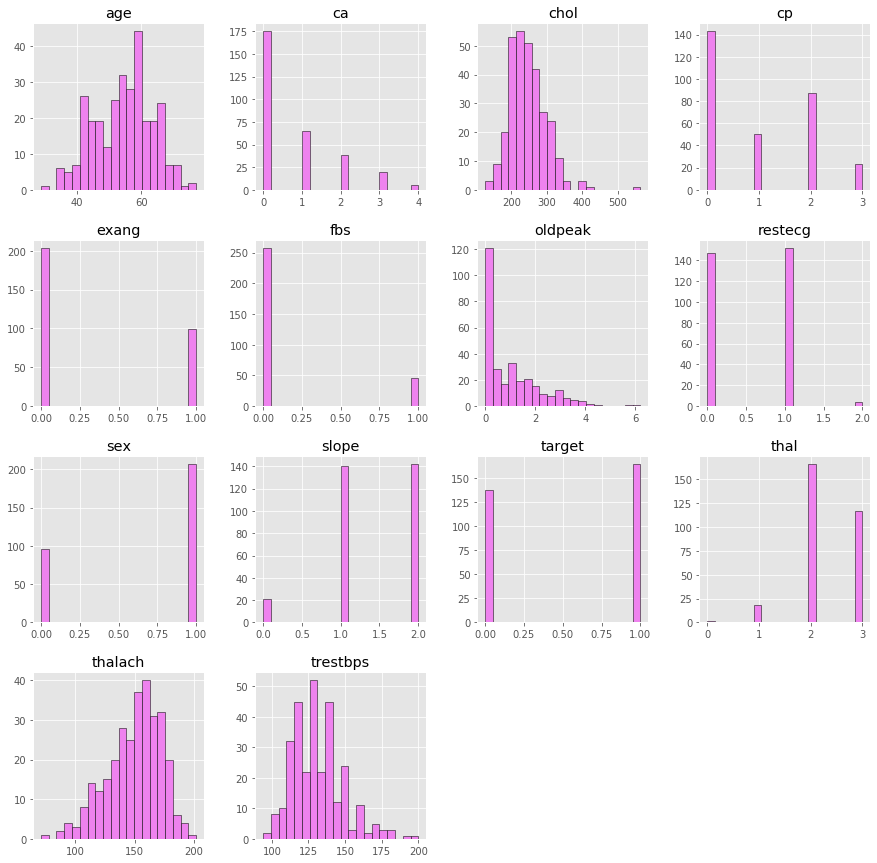

In [100]:
df.hist(bins=20,figsize=(15,15),grid=True,ec='black',color='violet')
plt.show()

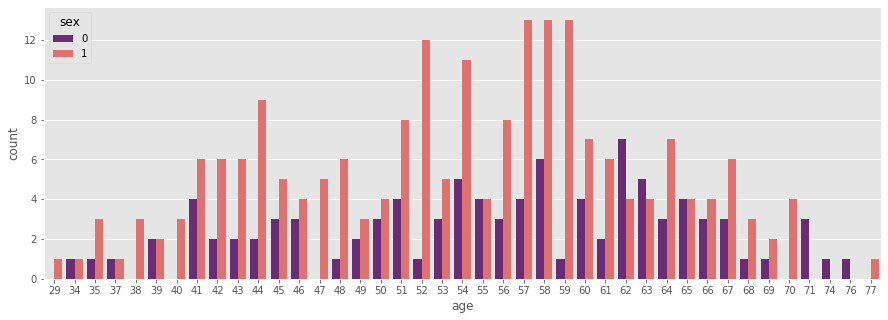

In [93]:
plt.figure(figsize=(15,5))
sns.countplot('age',data = df,hue='sex',palette='magma')

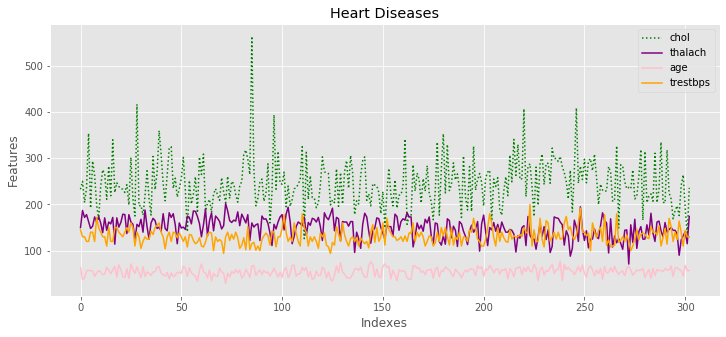

In [149]:
plt.figure(figsize=(12,5))
df['chol'].plot(kind="line",color="green",label="chol",grid=True,linestyle=":")
df['thalach'].plot(kind="line",color="purple",label="thalach",grid=True)
df['age'].plot(kind="line",color="pink",label="age",grid=True)
df['trestbps'].plot(kind="line",color="orange",label="trestbps",grid=True)
plt.legend(loc="upper right") #legend: puts feature label into plot
plt.xlabel("Indexes")
plt.ylabel("Features")
plt.title("Heart Diseases")
plt.show()

Text(0.5, 1.0, 'Trend of Resting Blood Pressure and Age')

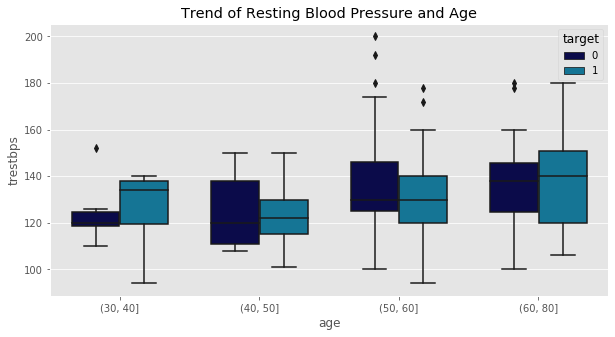

In [113]:
cat = pd.cut(df.age,[30,40,50,60,80])
df_new = df[['target','trestbps']]
df_new['age'] = cat
plt.figure(figsize=(10,5))
sns.boxplot(x='age',y='trestbps',hue='target',data=df_new, width=0.7,palette='ocean');
plt.title('Trend of Resting Blood Pressure and Age')

Text(0.5, 1.0, 'Trend of Cholestrol and Age')

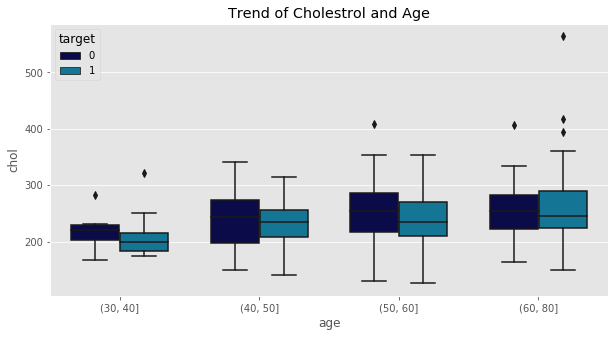

In [114]:
cat = pd.cut(df.age,[30,40,50,60,80])
df_new = df[['target','chol']]
df_new['age'] = cat
plt.figure(figsize=(10,5))
sns.boxplot(x='age',y='chol',hue='target',data=df_new, width=0.7,palette='ocean');
plt.title('Trend of Cholestrol and Age')

Text(0.5, 1.0, 'Trend of Maximum HeartRate achieved and Age')

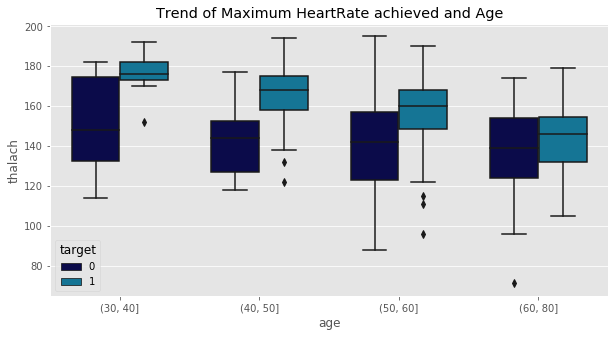

In [117]:
cat = pd.cut(df.age,[30,40,50,60,80])
df_new = df[['target','thalach']]
df_new['age'] = cat
plt.figure(figsize=(10,5))
sns.boxplot(x='age',y='thalach',hue='target',data=df_new, width=0.7,palette='ocean');
plt.title('Trend of Maximum HeartRate achieved and Age')

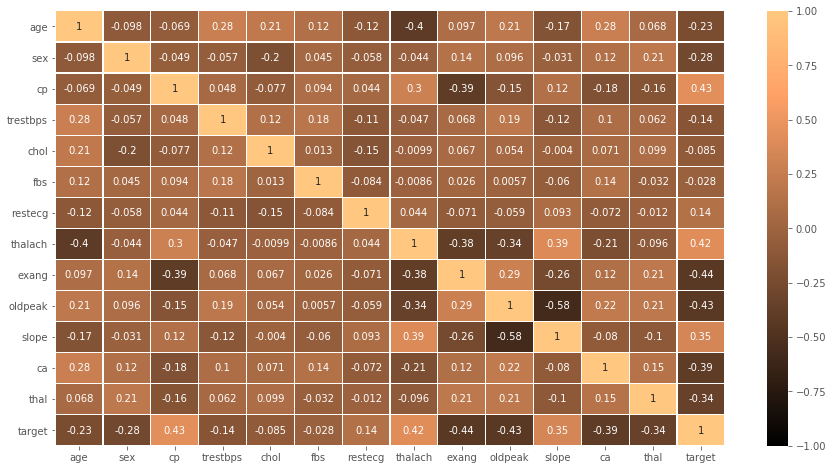

In [127]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='copper', linewidths=0.1, annot=True, vmax=1, vmin=-1)

<Figure size 1080x864 with 0 Axes>

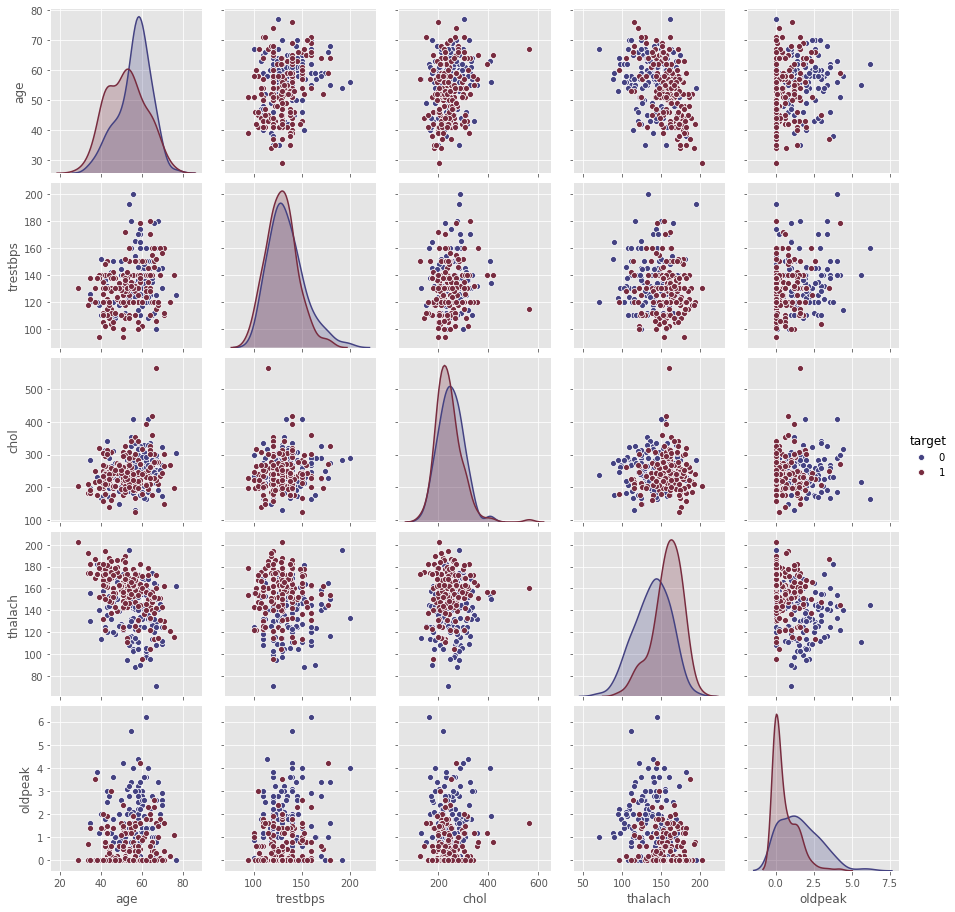

In [148]:
plt.figure(figsize = (15,12))
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']],hue='target',palette='icefire')
plt.show()

### Random Forest

In [14]:
X= df.drop('target',axis=1) 
y=df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [14]:
model = RandomForestClassifier()

In [15]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2)

In [16]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=41, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   0.5s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_s

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_s

[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=64 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=64, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_s

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=41 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=41, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=41 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=41, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_s

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [17]:
grid.best_params_

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

In [20]:
model = RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=25)

In [21]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.score(X_test,y_test)

0.8852459016393442

### Test 1

In [30]:
print("Enter Patients Name:")
name = input()
print("Enter Patients Age:")
age = int(input())
print("Enter Patients Gender (if male=1,if female=0):")
sex = int(input())  
print("What is your chest pain type -")                                                                              
print("0:Typical Angina,")                                                                                          
print("1:Atypical Angina,")                                                                                            
print("2:Non-anginal pain,")                                                                                        
print("3:Asymptomatic")                                                                                             
cp = int(input())
print("What is your Resting Blood Pressure:")
trestbps = int(input())
print("What is your Serum Cholestrol level:")
chol = int(input())
print("Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)")
fbs = int(input())
print("What is your Resting Electrocardiographic Results -")                                                                              
print("Value 0: normal")
print("Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)")
print("Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria")
restecg = int(input())
print("What is your maximum heart rate achieved")  
thalach = int(input())
print("Do you have Exercise Induced Angina? (1=True, 0=False)")  
exang = int(input())
print("What is your ST depression induced by exercise relative to rest?")  
oldpeak = float(input())
print("What is the slope of the peak exercise ST segment  -")   
print("1: Upsloping")
print("2: Flat")
print("3: Downsloping")
slope = int(input())
print("What is your number of major vessels (0-4) colored by flourosopy ")   
ca = int(input())
print("What is your heart rate defect values (0-3)")   
thal = int(input())

Enter Patients Name:
Riya
Enter Patients Age:
60
Enter Patients Gender (if male=1,if female=0):
0
What is your chest pain type -
0:Typical Angina,
1:Atypical Angina,
2:Non-anginal pain,
3:Asymptomatic
0
What is your Resting Blood Pressure:
117
What is your Serum Cholestrol level:
230
Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)
1
What is your Resting Electrocardiographic Results -
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
1
What is your maximum heart rate achieved
160
Do you have Exercise Induced Angina? (1=True, 0=False)
1
What is your ST depression induced by exercise relative to rest?
1.4
What is the slope of the peak exercise ST segment  -
1: Upsloping
2: Flat
3: Downsloping
2
What is your number of major vessels (0-4) colored by flourosopy 
2
What is your heart rate defect values (0-3)
3


In [31]:
arr = [[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
x = model.predict(arr)[0]
[]
perc = str(int(model.predict_proba(arr)[0,1]*100))
print('Hello ' + name + '!')
if (x==0):
    print('You are safe from any kind of Heart Diseases')
    print('You have only '+perc+'% chances of getting a Heart Disease which is normal for a healthy human being')
else:
    print('You have a Heart Disease')
    print('You have a high '+perc+'% chances of getting a Heart Disease. You must immediately consult a doctor')


Hello Riya!
You are safe from any kind of Heart Diseases
You have only 20% chances of getting a Heart Disease which is normal for a healthy human being


### Test 2

In [32]:
print("Enter Patients Name:")
name = input()
print("Enter Patients Age:")
age = int(input())
print("Enter Patients Gender (if male=1,if female=0):")
sex = int(input())  
print("What is your chest pain type -")                                                                              
print("0:Typical Angina,")                                                                                          
print("1:Atypical Angina,")                                                                                            
print("2:Non-anginal pain,")                                                                                        
print("3:Asymptomatic")                                                                                             
cp = int(input())
print("What is your Resting Blood Pressure:")
trestbps = int(input())
print("What is your Serum Cholestrol level:")
chol = int(input())
print("Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)")
fbs = int(input())
print("What is your Resting Electrocardiographic Results -")                                                                              
print("Value 0: normal")
print("Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)")
print("Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria")
restecg = int(input())
print("What is your maximum heart rate achieved")  
thalach = int(input())
print("Do you have Exercise Induced Angina? (1=True, 0=False)")  
exang = int(input())
print("What is your ST depression induced by exercise relative to rest?")  
oldpeak = float(input())
print("What is the slope of the peak exercise ST segment  -")   
print("1: Upsloping")
print("2: Flat")
print("3: Downsloping")
slope = int(input())
print("What is your number of major vessels (0-4) colored by flourosopy ")   
ca = int(input())
print("What is your heart rate defect values (0-3)")   
thal = int(input())

Enter Patients Name:
Abhinav
Enter Patients Age:
42
Enter Patients Gender (if male=1,if female=0):
1
What is your chest pain type -
0:Typical Angina,
1:Atypical Angina,
2:Non-anginal pain,
3:Asymptomatic
1
What is your Resting Blood Pressure:
120
What is your Serum Cholestrol level:
295
Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)
0
What is your Resting Electrocardiographic Results -
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
1
What is your maximum heart rate achieved
162
Do you have Exercise Induced Angina? (1=True, 0=False)
0
What is your ST depression induced by exercise relative to rest?
0.2
What is the slope of the peak exercise ST segment  -
1: Upsloping
2: Flat
3: Downsloping
2
What is your number of major vessels (0-4) colored by flourosopy 
0
What is your heart rate defect values (0-3)
2


In [33]:
arr = [[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
x = model.predict(arr)[0]
[]
perc = str(int(model.predict_proba(arr)[0,1]*100))
print('Hello ' + name + '!')
if (x==0):
    print('You are safe from any kind of Heart Diseases')
    print('You have only '+perc+'% chances of getting a Heart Disease which is normal for a healthy human being')
else:
    print('You have a Heart Disease')
    print('You have a high '+perc+'% chances of getting a Heart Disease. You must immediately consult a doctor')


Hello Abhinav!
You have a Heart Disease
You have a high 85% chances of getting a Heart Disease. You must immediately consult a doctor


### Confusion Matrix

In [31]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[26,  3],
       [ 5, 27]], dtype=int64)

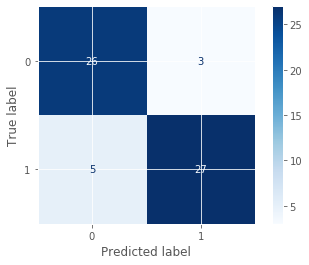

In [32]:
class_names = [0,1]
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues,labels=class_names,ax=None)
plt.show()